In [1]:
#project: p8
#submitter: ylin363
#partner: lin383

In [2]:
import csv

In [3]:
# loads a file that can be used to lookup names from IDs
def get_mapping(path):
    file = open(path, encoding='utf-8')
    file_reader = csv.reader(file)
    mapping_data = list(file_reader)
    file.close()
    mapping_dict = {}
    for data in mapping_data:
        mapping_dict[data[0]] = data[1]
    return mapping_dict

In [4]:
# Q1: what is returned by your get_mapping("small_mapping.csv") function?
mapping = get_mapping("small_mapping.csv")
mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [5]:
# Q2: what is the value associated with the key "nm0752751"?
mapping["nm0752751"]

'Mitchell Ryan'

In [6]:
# Q3: what are the values in the mapping associated with keys beginning with "nm"?
list_nm = []
for key in mapping:
    if "nm" in key:
        list_nm.append(mapping[key])

list_nm

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [7]:
# Q4: which keys in the mapping map to people with a first name of "Gary"?
garyLisy = []
for key in mapping:
    if 'Gary' in mapping[key]:
        garyLisy.append(str(key))
garyLisy

['nm0000997', 'nm0001219']

In [8]:
# loads movie data with info represented using IDs
def get_raw_movies(path):
    file = open(path, encoding='utf-8')
    file_reader = csv.reader(file)
    movie_data = list(file_reader)
    file.close()
    header = movie_data[0]
    
    movie_list = []
    for data in movie_data[1:]:
        movie_dic = {}
        movie_dic["title"] = data[header.index("title")]
        movie_dic["year"] = int(float(data[header.index("year")]))
        movie_dic["rating"] = float(data[header.index("rating")])
        movie_dic["directors"] = data[header.index("directors")].split(",")
        movie_dic["actors"] = data[header.index("actors")].split(",")
        movie_dic["genres"] = data[header.index("genres")].split(",")
        movie_list.append(movie_dic)
        
    return movie_list

In [9]:
# Q5: what does get_raw_movies("small_movies.csv") return?
movie_list = get_raw_movies("small_movies.csv")
movie_list

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [10]:
# Q6: how many genres did the movie at index 0 have?
len(movie_list[0]["genres"])

3

In [11]:
# Q7: what is the ID of the last actor listed for the move at index 1?
movie_list[1]["actors"][-1]

'nm0752751'

In [12]:
# uses the other two functions to load movie data, then replace IDs with names
def get_movies(movies_path, mapping_path):
    file1 = open(mapping_path, encoding='utf-8')
    file1_reader = csv.reader(file1)
    mapping_data = list(file1_reader)
    file1.close()
    name_dic = {}
    for data in mapping_data:
        name_dic[data[0]] = data[1]

    file2 = open(movies_path, encoding='utf-8')
    file2_reader = csv.reader(file2)
    movie_data = list(file2_reader)
    file2.close()
    header = movie_data[0]
    
    movie_list = []
    for data in movie_data[1:]:
        movie_dic = {}
        movie_dic["title"] = name_dic[data[header.index("title")]]
        movie_dic["year"] = int(float(data[header.index("year")]))
        movie_dic["rating"] = float(data[header.index("rating")])
        
        director_list = data[header.index("directors")].split(",")
        list1 = []
        for ID in director_list:
            list1.append(name_dic[ID])
        movie_dic["directors"] = list1
        
        actors_list = data[header.index("actors")].split(",")
        list2 = []
        for ID in actors_list:
            list2.append(name_dic[ID])
        movie_dic["actors"] = list2
 
        movie_dic["genres"] = data[header.index("genres")].split(",")
        movie_list.append(movie_dic)
    return movie_list

In [13]:
small = get_movies("small_movies.csv", "small_mapping.csv")
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [14]:
# Q8: what is small[0]["title"]?
small[0]["title"]

'Runaway Jury'

In [15]:
# Q9: what is small[1]["actors"]?
small[1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [16]:
# Q10: what is small[-1]["directors"]?
small[-1]["directors"]

['Richard Donner']

In [17]:
# Q11: what is small?
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [18]:
movies = get_movies("movies.csv", "mapping.csv")

In [19]:
# Q12: what are the first 3 rows in movies?
movies[0:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [20]:
# Q13: what are the last 3 rows in movies?
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [21]:
import copy
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [22]:
# Q14: what are the movies from 1931?
movies_1931 = copy.deepcopy(movies)
filter_movies_by_year(movies_1931, 1931)
movies_1931

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [23]:
# Q15: what are the movies from 1932?
movies_1932 = copy.deepcopy(movies)
filter_movies_by_year(movies_1932, 1932)
movies_1932

[{'title': 'Texas Cyclone',
  'year': 1932,
  'rating': 6.2,
  'directors': ['D. Ross Lederman'],
  'actors': ['Wallace MacDonald', 'Tim McCoy', 'Wheeler Oakman', 'John Wayne'],
  'genres': ['Action', 'Western']},
 {'title': 'Haunted Gold',
  'year': 1932,
  'rating': 5.5,
  'directors': ['Mack V. Wright'],
  'actors': ['Otto Hoffman',
   'John Wayne',
   'Duke',
   'Harry Woods',
   'Erville Alderson'],
  'genres': ['Horror', 'Mystery', 'Western']},
 {'title': 'Girl Crazy',
  'year': 1932,
  'rating': 6.3,
  'directors': ['William A. Seiter'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Eddie Quillan'],
  'genres': ['Comedy']},
 {'title': 'Hot Saturday',
  'year': 1932,
  'rating': 6.6,
  'directors': ['William A. Seiter'],
  'actors': ['Cary Grant', 'Randolph Scott', 'Edward Woods'],
  'genres': ['Drama', 'Romance']},
 {'title': 'Lady and Gent',
  'year': 1932,
  'rating': 5.7,
  'directors': ['Stephen Roberts'],
  'actors': ['Morgan Wallace',
   'George Bancroft',
   'Charles St

In [24]:
def unique(header):
    unique_list = []
    for dic in movies:
        for element in dic[header]:
            if element not in unique_list:
                unique_list.append(element)
    return unique_list

In [25]:
# Q16: how many unique genres are there in the dataset?
len(unique("genres"))

18

In [26]:
# Q17: how many unique director names are there in the dataset?
len(unique("directors"))

1247

In [27]:
# Q18: which movie has the highest number of actors? Output should be the movie title in string format.
highest = 0
longest_movie = None
for dic in movies:
    if highest < len(dic["actors"]):
        highest = len(dic["actors"])
        longest_movie = dic

longest_movie["title"]

'Shoulder Arms'

In [28]:
# Q19: what is the average movie rating?
sum = 0
for dic in movies:
    sum += dic["rating"]
avg = sum / len(movies)
avg

6.401659528907912

In [29]:
# Q20: what is the longest movie title in the dataset (in terms of most characters)?
longest = 0
longest_movie = None
for dic in movies:
    if longest < len(dic["title"].replace(" ", "")):
        longest = len(dic["title"].replace(" ", ""))
        longest_movie = dic
longest_movie["title"]

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [30]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [31]:
# return dict of lists of movie dicts
def bucketize(movie_list, movie_key):
    dic = {}
    for each in movie_list:
        if type(each[movie_key]) is list:
            for i in range(len(each[movie_key])):
                if each[movie_key][i] not in dic:
                    dic[each[movie_key][i]] = []
                    dic[each[movie_key][i]].append(each)
                else:
                    dic[each[movie_key][i]].append(each)
        else:
            if each[movie_key] not in dic:
                dic[each[movie_key]] = []
                dic[each[movie_key]].append(each)
            else:
                dic[each[movie_key]].append(each)
    return dic

In [32]:
# Q21: what is bucketize(test_movies, "year")?
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [33]:
# Q22: what is bucketize(test_movies, "style")?
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [34]:
# Q23: what is bucketize(test_movies, "genres")?
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [35]:
# Q24: what is bucketize(small, "genres")?
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [36]:
# Q25: how many different unique actors appear in the small dataset?
len(bucketize(small, "actors"))

7

In [37]:
# Q26: how many unique actors appear in the full dataset?
len(bucketize(movies, "actors"))

2605

In [38]:
def bucket_counts(movies, genre_key):
    genre_movie = {}
    bucket = bucketize(movies, genre_key)
#     print(bucket)
    for genre_key in bucket:
        genre_movie[genre_key] = (len(bucket[genre_key]))
    return genre_movie

In [39]:
# Q27: how many movies are there of each genre?
genre_movie = bucket_counts(movies, "genres")
genre_movie

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [40]:
%matplotlib inline

In [41]:
import matplotlib, pandas

def plot_dict(d, label="Number of Movies"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

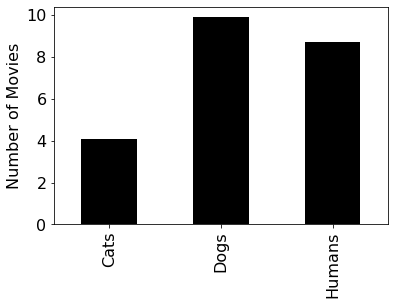

In [42]:
scores = {"Dogs": 9.9, "Cats": 4.1, "Humans": 8.7}
plot_dict(scores)

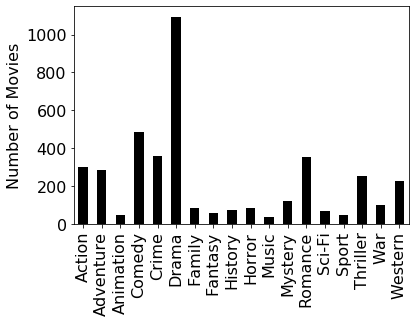

In [43]:
# Q28: how many movies are there of each genre? (plot your answer)
plot_dict(genre_movie)

In [44]:
def plot_dict(d, label="Number of Movies"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [45]:
test_movies = [
                {"title": "A", "year": 1999, "style": "short", "genres": ["g1"]},
                {"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
                {"title": "C", "year": 2001, "style": "short", "genres": ["g3"]},
                {"title": "D", "year": 2005, "style": "long", "genres": ["g1", "g2", "g3"]},
            ]

In [46]:
# select the movies in interval |greater_than_year < movies' year < less_than_year|
def filter_year(movies, greater_than_year, less_than_year):
    if greater_than_year == None:
        greater_than_year = -100000
    if less_than_year == None:
        less_than_year = 100000
    filter_list = []
    
    for movie in movies:
        if movie["year"] < less_than_year:
            filter_list.append(movie)
        if movie["year"] > greater_than_year:
            filter_list.append(movie)
    
    return filter_list

In [47]:
filter_year(test_movies, 2003, None)

[{'title': 'A', 'year': 1999, 'style': 'short', 'genres': ['g1']},
 {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
 {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
 {'title': 'C', 'year': 2001, 'style': 'short', 'genres': ['g3']},
 {'title': 'D', 'year': 2005, 'style': 'long', 'genres': ['g1', 'g2', 'g3']},
 {'title': 'D', 'year': 2005, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]

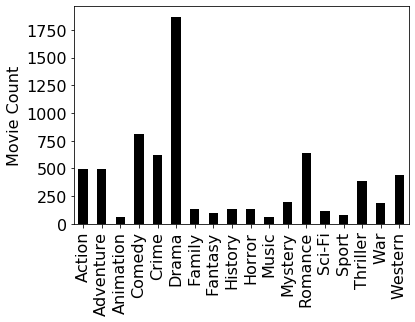

In [48]:
# Q29: how many movies are there of each genre, prior to 2000? (plot your answer)
plot_dict(bucket_counts(filter_year(movies, None, 1999), "genres"), "Movie Count")

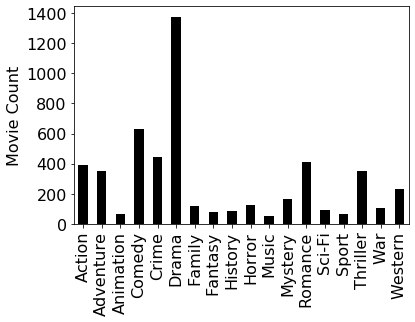

In [49]:
# Q30: how many movies are there of each genre, in or after 2000? (plot your answer)
plot_dict(bucket_counts(filter_year(movies, 2000, None), "genres"), "Movie Count")

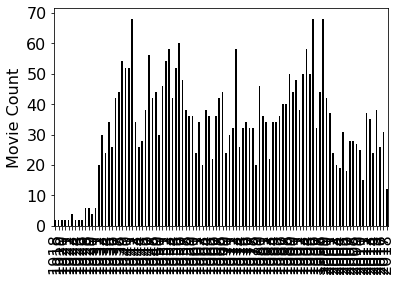

In [50]:
# Q31: how many movies have there been per year, since (and including) 2000? (plot your answer)
plot_dict(bucket_counts(filter_year(movies, None, 2001), "year"), "Movie Count")

In [51]:
# Q32: what are the directing career spans of the directors who have directed for at least 30 years?
directors = bucketize(movies, "directors")
span_dir = {}
for director in directors:
    years_list = []
    for movie in directors[director]:
        years_list.append(movie["year"])
    span = max(years_list) - min(years_list)
    span_dir[director] = span

years30_dic = {}
for director in directors:
    if span_dir[director] >= 30:
        years30_dic[director] = span_dir[director]
years30_dic

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [52]:
# Q33: what are the acting career spans of the actors who have acted for at least 50 years?
actors = bucketize(movies, "actors")
span_dir1 = {}
for actor in actors:
    years_list = []
    for movie in actors[actor]:
        years_list.append(movie["year"])
    span = max(years_list) - min(years_list)
    span_dir1[actor] = span
years50_actor = {}
for actor in actors:
    if span_dir1[actor] >= 50:
        years50_actor[actor] = span_dir1[actor]
years50_actor

{'Kurt Russell': 50,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Glenn Ford': 52,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'George Burns': 60,
 'Dean Stockwell': 53}

In [53]:
def row_ranking(row):
    return row["span"]

def top_n_span(buckets, n):
    # TODO: spans should be a dictionary mapping name to career span
    
    head = bucketize(movies, buckets)
    spans = {}
    for h in head:
        years_list = []
        for movie in head[h]:
            years_list.append(movie["year"])
        span = max(years_list) - min(years_list)
        spans[h] = span
    
    rows = []
    for name in spans:
        span = spans[name]
        rows.append({"name": name, "span": span})

    # we want to sort the rows so that those with the biggest spans
    # are first.  Notice that we aren't calling row_ranking, but rather
    # passing a reference to this function to the sort method.  The sort
    # method uses this function to determine how to rank the rows.
    # 
    # we do a reverse sort because we want the biggest spans first,
    # not last
    rows.sort(key=row_ranking, reverse=True)

    # TODO: return a slice of the rows
    return rows[:n]

In [54]:
# Q34: who are the 10 directors with the longest careers?
top_n_span("directors", 10)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [55]:
# Q35: who are the 10 actors with the longest careers?
top_n_span("actors", 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [66]:
def find_median(bucket):
    list_median = []
    for i in range(len(bucket)):
        list_median.append(bucket[i]["rating"])
    list_median.sort()
    if len(list_median) % 2 == 1:
        return list_median[len(list_median) // 2]
    else:
        v1 = list_median[len(list_median) // 2]
        v2 = list_median[len(list_median) // 2 - 1]
        return (v1+v2) / 2
    

def row_ranking(row):
    return row["rating"]

def top_n_rating(header, n):
    genres_bucket = bucketize(movies, header)
    rows = []
    for genres in genres_bucket:
        median_rating = find_median(genres_bucket[genres])
        rows.append({"category": genres, "rating": median_rating , "count": len(genres_bucket[genres])})

    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]

In [67]:
# Q36: what are the three genres in which movies receive the highest median rating?
top_n_rating("genres", 3)

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [68]:
def top_n_rating1(header, n):
    year_bucket = bucketize(movies, header)
    rows = []
    for years in year_bucket:
        highest_median = find_median(year_bucket[years])
        rows.append({"category": years, "rating": highest_median , "count": len(year_bucket[years])})

    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]

In [69]:
#Q37: what were the 10 best years for movies?
top_n_rating1("year", 10)

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [70]:
def top_n_rating2(header, n):
    year_bucket = bucketize(movies, header)
    rows = []
    for years in year_bucket:
        if len(year_bucket[years]) >= 10:
            highest_median = find_median(year_bucket[years])
            rows.append({"category": years, "rating": highest_median , "count": len(year_bucket[years])})

    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]

In [71]:
#Q38: what were the 5 best years for movies, if we only consider years with at least 10 movies?
top_n_rating2("year", 5)

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [72]:
def top_n_best(header, n, at_least):
    people_bucket = bucketize(movies, header)
    rows = []
    for people in people_bucket:
        if len(people_bucket[people]) >= at_least:
            highest_median = find_median(people_bucket[people])
            rows.append({"category": people, "rating": highest_median , "count": len(people_bucket[people])})

    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]

In [73]:
#Q39: who are the best 4 directors, if we only count directors having at least 3 movies?
top_n_best("directors", 4, 3)

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7}]

In [74]:
#Q40: who are the 3 best actors, if we only count actors having at least 5 movies?
top_n_best("actors", 3, 5)

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]